# The Basics

Basic tutorial using the tf.keras API to build and train models. 


**Aim of project**: Build and train a model that can recognise clothing

**Dataset**: "Fashion MNIST" is 70,000 grayscale images in 10 categories. 60,000 to train and 10,000 to evaluate.


Fashion MNIST and MNIST are good at checking if the model works before deploying on the actual data.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sys # python version only, not needed for tf

print(tf.__version__)
print(sys.version)

2.4.1
3.8.7 (v3.8.7:6503f05dd5, Dec 21 2020, 12:45:15) 
[Clang 6.0 (clang-600.0.57)]


## Import and load the data
* data is loaded into numpy arrays
* comprises of training and test data
* images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255
* Labels correspond to:
    0. T-shirt/top
    1. Trouser
    2. Pullover
    3. Dress
    4. Coat
    5. Sandal
    6. Shirt
    7. Sneaker
    8. Bag
    9. Ankle boot

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


explore the data

In [4]:
print(train_images.shape)
print(test_images.shape)
print(len(train_images))
print(len(test_images))

(60000, 28, 28)
(10000, 28, 28)
60000
10000


## Preprocess the data
currently pixel data is 0-255, we need to convert it to 0-1

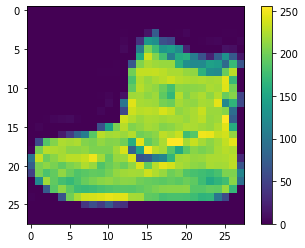

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images/255
test_images = test_images/255

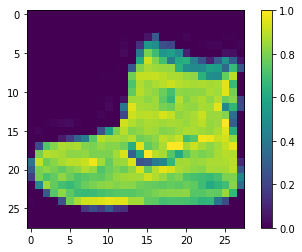

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Prior to training, check that the images and labels are correctly ordered.

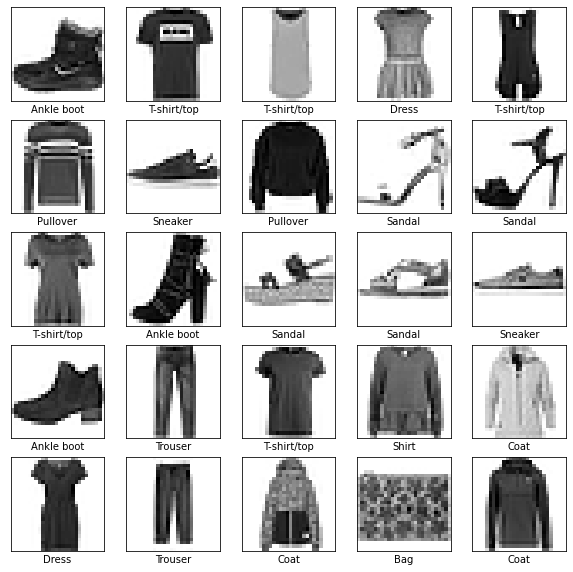

In [8]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Build the model
First configure the layers, then compile the model

*Layers* extract representations from data fed into them

Deep learning consists of several layers

We will use 3:
1. No learning, reshape to a one dimensional array
2. Fully connected dense neural layer (with 128 nodes)
3. Fully connected dense neural layer (with 10 nodes) - returns logits array with length of 10
    * Each node will contain a score that indicates that the image belongs to a particular class


    
logits - "The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function."

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Compile the model
Add additional features to the model during compiling:

* *Loss function* - Measures how accurate the model is during training, aim is to minimise these
* *Optimiser* - How the model is updated, based on the data and the loss function
* *Metrics* - Used to mnitor training and testing steps. eg. accuracy is an example of a metrics



In [10]:
model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Training the model
Steps of training:

1. Feed the model the **training data** (images and labels)
2. The model learns to associate images and labels
3. Ask the model to make predictions on the **test data**
4. Verify the models predictions with the **test data** labels

### Feed the model
**epochs** roughly means how many times you go through your training set. 


Note how the accuracy gradually increases.

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6313 - accuracy: 0.7831
Epoch 2/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.3942 - accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.3357 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.3186 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.2900 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.2765 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.2691 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 998us/step - loss: 0.2492 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.2428 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 966us/

### Evaluate the accuracy
How accurate is the model at evaluating the **test data**


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)


313/313 - 0s - loss: 0.3229 - accuracy: 0.8877


An accuracy of 0.88 is quite alot less than 0.91 in terms of ML.

*Obverfitting* is occuring. The model "memorises" the noise of the training data, negatively effecting its performance on new data

We will come back to this at a later stage. 

### Make predictions

Logits are the raw model outputs, first we must normalise them.  

We will attach a *softmax layer*, which converts them to probabilities


In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

For each image in the test set, the model has predicted the probability that the image belongs to 1 of the 10 classes of clothing. 

Each value represents the *models confidence*

In [15]:
predictions[0]

array([3.4426237e-06, 2.3879616e-07, 1.4682944e-07, 1.9588482e-08,
       3.5430352e-07, 1.0676072e-03, 1.0892354e-06, 2.4077520e-02,
       8.6073842e-06, 9.7484100e-01], dtype=float32)

In [16]:
highest_value = np.argmax(predictions[0])
print(highest_value)
print(class_names[highest_value])

9
Ankle boot


### Verify predictions

Define plotting functions. 
* blue indicates correctly identified
* red failures
* converts prediction to a percentage

`plot_image` - plot the image, prediction, and if correct (red/blue)
`plot_value_array` - plot barchat of array prediction scores, and if correct (red/blue)

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


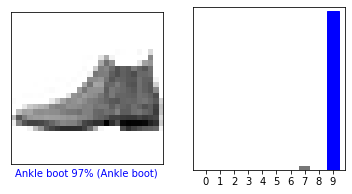

In [18]:
i = 0 

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


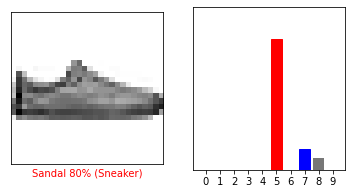

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


The model can be wrong, even when very confident

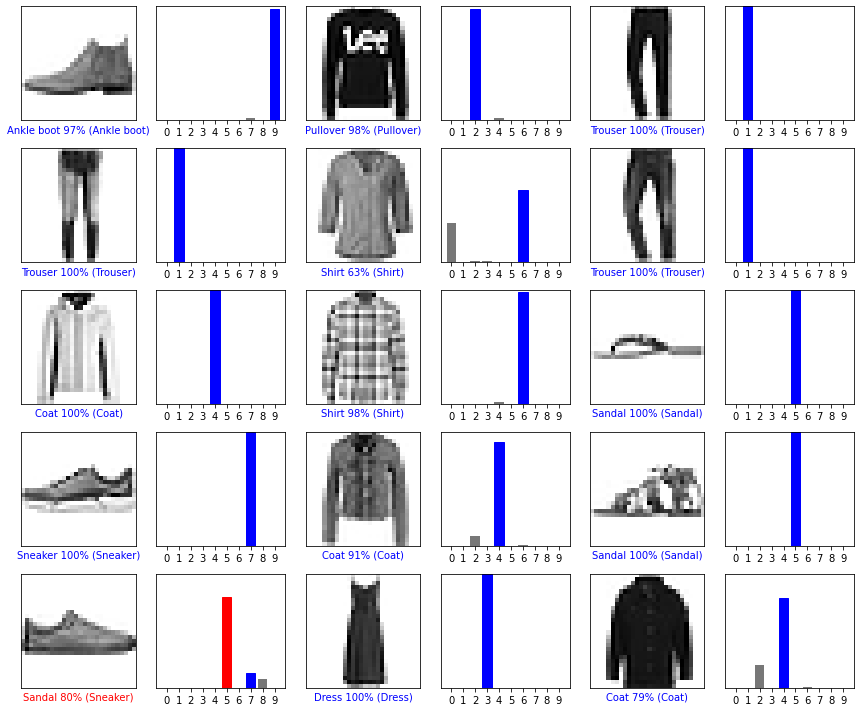

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


### Using the trained model 
We can now use the trained model to evaluate a single instant (i.e. image) 

usually keras is used for batch processing, so we still need to add the single image to a list

In [27]:
test_image_index = 10

img = test_images[test_image_index]
img = np.expand_dims(img, 0)

img.shape

(1, 28, 28)

predict the correct label

In [28]:
predictions_single = probability_model.predict(img)
predictions_single

array([[1.0142525e-05, 1.3769181e-06, 8.3044447e-02, 1.5860037e-08,
        9.0810472e-01, 2.2927861e-10, 8.8392952e-03, 5.8495632e-11,
        5.0005706e-08, 3.7582312e-10]], dtype=float32)

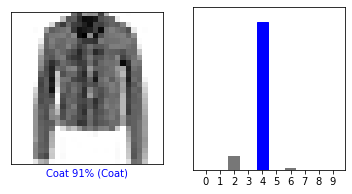

In [29]:
i = test_image_index
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()